In [1]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

np.random.seed(42)

In [2]:
#Generate Data
X = np.linspace(0, 10, 100)
y = 3 * X + 7 + np.random.normal(0, 5, 100)

X = X.reshape(-1, 1)

In [3]:
#sklearn KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

model = LinearRegression()
sklearn_errors = []

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    sklearn_errors.append(mse)

print("Sklearn Fold Errors:", sklearn_errors)
print("Average Sklearn CV Error:", np.mean(sklearn_errors))

Sklearn Fold Errors: [15.551056057254451, 12.781686753189565, 28.08870262881195, 12.679946112711825, 34.53115764129613]
Average Sklearn CV Error: 20.726509838652785


In [6]:
# Recompute custom KFold inside this notebook

def k_fold_split(X, y, k=5, shuffle=True):
    indices = np.arange(len(X))
    if shuffle:
        np.random.shuffle(indices)

    fold_sizes = np.full(k, len(X) // k)
    fold_sizes[:len(X) % k] += 1

    current = 0
    folds = []

    for fold_size in fold_sizes:
        start, stop = current, current + fold_size
        folds.append(indices[start:stop])
        current = stop

    return folds


k = 5
folds = k_fold_split(X, y, k=k)

model = LinearRegression()
errors = []

for i in range(k):
    test_idx = folds[i]
    train_idx = np.concatenate([folds[j] for j in range(k) if j != i])

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    errors.append(mse)

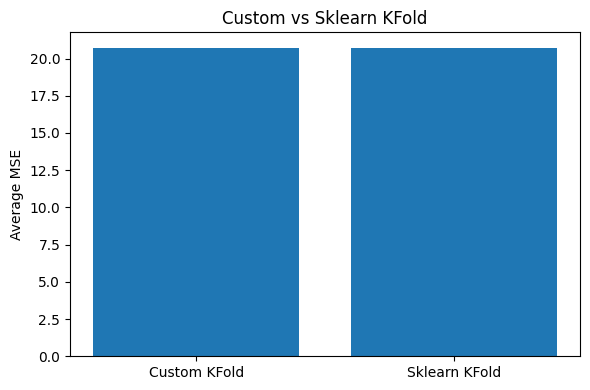

In [7]:
#Compare Custom vs Sklearn
custom_avg = np.mean(errors)
sklearn_avg = np.mean(sklearn_errors)

plt.figure(figsize=(6,4))
plt.bar(["Custom KFold", "Sklearn KFold"], [custom_avg, sklearn_avg])
plt.ylabel("Average MSE")
plt.title("Custom vs Sklearn KFold")
plt.tight_layout()
plt.show()